# Jawablah poin-poin assignment berikut
#### perhatikan dengan baik apa yang diminta pada soal

# 1. Anda bekerja sebagai seorang data scientist, atasan anda mengirimkan anda data kepada anda dan meminta untuk memberikan analisa dengan menggunakan semua metode pada data manipulation berikut :
- a. Filtering
- b. Sorting
- c. Grouping / Aggregasi
- d. Join / Merging
- e. Pivot
- f. Crosstab
- g. Appending
- h. Mengeksplor terkait dengan operasi pada Datetime (week, day, dan sebagainya)
### Notes : Sebelum menjawab permintaan diatas, pertama-tama awali dengan mengajukan pertanyaan analisa terlebih dahulu dan tulis insight dari yang anda dapat, **pertanyaan analisa dilakukan pada semua metode data manipulation diatas**

In [ ]:
import pandas as pd

# load dataset utama
df = pd.read_csv('supermarket_sales.csv')

# cek 5 baris awal
df.head()

# pastikan kolom tanggal jadi datetime
df['Date'] = pd.to_datetime(df['Date'])


#Filtering
Siapa pelanggan dengan transaksi besar? Berapa banyak transaksi dengan Total > 500 dari pelanggan bertipe Member di tiap cabang?

In [ ]:
# filtering transaksi besar dari pelanggan Member
df_filter = df[(df['Total'] > 500) & (df['Customer type'] == 'Member')]

df_filter.head()

# lihat jumlahnya per cabang
filter_branch = df_filter['Branch'].value_counts()
filter_branch


,count
Branch,
B,40
C,40
A,39


#Insigth
Berdasarkan hasil filtering terhadap transaksi dengan nilai Total > 500 yang dilakukan oleh pelanggan bertipe Member, ditemukan bahwa distribusi transaksi bernilai tinggi cenderung merata di seluruh cabang. Cabang B dan C masing-masing mencatat 40 transaksi, sedangkan cabang A mencatat 39 transaksi, sehingga tidak terdapat perbedaan signifikan antar lokasi dalam hal kontribusi transaksi bernilai besar dari segmen pelanggan Member. Temuan ini mengindikasikan bahwa pelanggan Member memiliki perilaku belanja yang kuat dan konsisten, serta berpotensi menjadi segmen pelanggan yang bernilai tinggi bagi perusahaan. Dari perspektif bisnis, konsistensi transaksi premium dari kelompok Member dapat dimanfaatkan sebagai dasar pengembangan strategi loyalitas, program retensi, atau penawaran eksklusif untuk meningkatkan customer lifetime value serta menjaga daya saing cabang tanpa perlu melakukan diferensiasi strategi yang terlalu spesifik antar lokasi.

#Sorting
Bulan mana yang memiliki total penjualan terbesar dan terkecil?

In [ ]:
# buat kolom bulan (nama bulan)
df['month'] = df['Date'].dt.to_period('M').astype(str)

# total penjualan per bulan
sales_per_month = df.groupby('month')['Total'].sum().reset_index()

# sorting dari terbesar ke terkecil
sales_per_month_sorted = sales_per_month.sort_values('Total', ascending=False)
sales_per_month_sorted


,month,Total
0,2019-01,116291.868
2,2019-03,109455.507
1,2019-02,97219.374


#Insigth
Hasil sorting terhadap total penjualan per bulan menunjukkan bahwa bulan Januari 2019 merupakan periode dengan total penjualan tertinggi sebesar 116.291,87, disusul oleh Maret 2019 sebesar 109.455,51, sedangkan bulan dengan total penjualan terendah adalah Februari 2019 sebesar 97.219,37. Pola ini mengindikasikan adanya fluktuasi penjualan dalam rentang waktu tiga bulan, di mana performa penjualan tidak stabil dan cenderung mengalami penurunan pada Februari sebelum kembali meningkat di bulan Maret. Dari perspektif bisnis, dinamika ini memberikan gambaran awal terkait potensi siklus penjualan serta dapat menjadi dasar untuk mengevaluasi faktor-faktor yang mempengaruhi peningkatan dan penurunan transaksi, seperti momentum promosi, kondisi pasar, atau preferensi pelanggan pada waktu tertentu.

#Grouping dan Agregasi
Bagaimana perbandingan rata-rata nilai transaksi dan rating pelanggan antar cabang?

In [ ]:
# grouping berdasarkan Branch (kategori)
group_branch = df.groupby('Branch').agg({
    'Total': ['mean', 'sum'],      # numerik 1
    'Rating': 'mean'               # numerik 2
}).reset_index()

group_branch


Branch       Total                 Rating
                mean          sum      mean
0      A  312.354031  106200.3705  7.027059
1      B  319.872506  106197.6720  6.818072
2      C  337.099715  110568.7065  7.072866

#Insigth
Hasil grouping dan agregasi berdasarkan variabel Branch menunjukkan bahwa terdapat variasi performa penjualan dan tingkat kepuasan pelanggan antar cabang. Cabang C memiliki rata-rata nilai transaksi tertinggi sebesar 337,10, disusul oleh cabang B sebesar 319,87, dan cabang A sebesar 312,35. Namun, apabila dilihat dari total akumulasi penjualan, cabang A mencatat nilai tertinggi sebesar 1.062.200,37, meskipun rata-rata transaksinya paling rendah, sedangkan cabang C dan B berada pada posisi berikutnya dengan total masing-masing sebesar 1.105.608,71 dan 1.061.697,62 (yang dalam selisihnya relatif tidak terlalu signifikan). Sementara itu, dari sisi rating pelanggan, cabang C memperoleh nilai rata-rata tertinggi sebesar 7,07, diikuti cabang A sebesar 7,03, dan cabang B berada pada posisi terendah dengan nilai sebesar 6,82.

Temuan ini mengindikasikan bahwa performa penjualan tertinggi secara keseluruhan tidak selalu berbanding lurus dengan persepsi kepuasan pelanggan. Cabang C menarik karena memiliki kombinasi rata-rata transaksi dan rating tertinggi, sedangkan cabang B menunjukkan rata-rata transaksi yang tinggi namun rating yang lebih rendah. Insight ini dapat menjadi dasar untuk evaluasi strategi operasional dan pelayanan, misalnya peningkatan pengalaman pelanggan di cabang B atau eksplorasi faktor yang membuat cabang C unggul dari sisi nilai transaksi maupun kepuasan pelanggan.

#Join/Merging
Apakah ada perbedaan performa penjualan antara cabang yang berada di kota berbeda jika kita gabungkan dengan informasi detail cabang?

In [ ]:
# load dataset tambahan
branch_info = pd.read_csv('branch_info.csv')   # misal punya kolom: Branch, City, Manager
product_info = pd.read_csv('product_info.csv') # misal punya kolom: Product line, Category

# join sales dengan branch_info
df_branch_merge = pd.merge(df, branch_info, on='Branch', how='left')

# join dengan product_info
df_full = pd.merge(df_branch_merge, product_info, on='Product line', how='left')

df_full.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,month,Region,Manager,Opened Year,Category,Supplier,Warranty (months)
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,4.761905,26.1415,9.1,2019-01,South,Alice,2015,Beauty,Supplier A,12.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,4.761905,3.8200,9.6,2019-03,North,Charlie,2016,Electronics,Supplier B,24.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,4.761905,16.2155,7.4,2019-03,South,Alice,2015,Home,Supplier C,18.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,4.761905,23.2880,8.4,2019-01,South,Alice,2015,Beauty,Supplier A,12.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,4.761905,30.2085,5.3,2019-02,South,Alice,2015,NaN,NaN,NaN


In [ ]:
df_full.groupby('City')['Total'].sum()

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


#Insigth
Setelah dilakukan proses penggabungan (join) antara data transaksi dengan informasi detail cabang, analisis per kota menunjukkan bahwa terdapat perbedaan performa penjualan antar lokasi. Kota Naypyitaw mencatat total penjualan tertinggi sebesar 110.568,71, diikuti oleh Yangon sebesar 106.200,37, dan Mandalay sebesar 106.197,67. Walaupun selisih total penjualan antar kota relatif tidak terlalu signifikan, hasil ini mengindikasikan bahwa cabang di Naypyitaw memiliki kontribusi penjualan yang sedikit lebih besar dibandingkan kota lainnya. Informasi tambahan dari hasil joining membuka konteks baru terhadap data penjualan, karena penambahan variabel lokasi memberikan perspektif spasial yang tidak terlihat apabila hanya menganalisis data transaksi secara mentah. Dari sudut pandang bisnis, perbedaan kinerja antar kota dapat menjadi dasar evaluasi terhadap potensi pasar lokal, strategi penetapan target pendapatan, serta alokasi sumber daya operasional pada masing-masing cabang.

#Pivot
Cabang mana yang paling kuat penjualannya untuk tiap product line?

In [ ]:
# pivot: rata-rata total per kombinasi Branch dan Product line
pivot_sales = pd.pivot_table(
    df,
    values='Total',
    index='Product line',   # kategori baris
    columns='Branch',       # kategori kolom
    aggfunc='mean'
)

pivot_sales


Branch,A,B,C
Product line,,,
Electronic accessories,305.285225,310.026245,344.890445
Fashion accessories,320.245265,264.730911,331.693385
Food and beverages,295.915526,304.297770,360.103864
Health and beauty,268.037298,376.993585,319.525500
Home and lifestyle,344.879931,350.983290,308.790067
Sports and travel,328.350839,322.390306,350.265067


#Insigth
Hasil pivot table yang membandingkan rata-rata nilai transaksi pada setiap product line untuk masing-masing cabang menunjukkan bahwa terdapat perbedaan preferensi atau kekuatan penjualan antar cabang. Cabang C menunjukkan performa tertinggi pada sebagian besar product line, seperti Electronic Accessories (344,89), Fashion Accessories (331,69), serta Food and Beverages (360,10). Cabang B unggul terutama pada kategori Health and Beauty (376,99) dan Home and Lifestyle (350,98), sedangkan cabang A memiliki performa yang relatif lebih merata namun tidak mendominasi pada product line tertentu. Sementara itu, pada kategori Sports and Travel, cabang C kembali mencatatkan rata-rata nilai transaksi tertinggi (350,27).

Hasil ini mengindikasikan bahwa tiap cabang memiliki komposisi kekuatan produk yang berbeda, yang dapat mencerminkan karakteristik pasar lokal, profil demografis pelanggan, atau strategi penawaran yang diterapkan pada masing-masing lokasi. Dari perspektif manajemen, informasi ini dapat digunakan untuk melakukan penyesuaian inventori, strategi pemasaran berbasis lokasi, serta optimalisasi alokasi produk untuk memaksimalkan pendapatan melalui pendekatan yang lebih tersegmentasi.

#Crosstab
Bagaimana distribusi metode pembayaran untuk tiap tipe pelanggan (Member vs Normal)?

In [ ]:
crosstab_pay = pd.crosstab(
    df['Customer type'],
    df['Payment'],
    normalize='index'   # pakai proporsi per baris, kalau mau hitung absolut hapus argumen ini
)

crosstab_pay


Payment,Cash,Credit card,Ewallet
Customer type,,,
Member,0.335329,0.343313,0.321357
Normal,0.352705,0.278557,0.368737


#Insigth
Hasil analisis crosstab yang membandingkan distribusi metode pembayaran berdasarkan tipe pelanggan menunjukkan adanya variasi preferensi pembayaran antara pelanggan Member dan Normal. Pada pelanggan bertipe Member, penggunaan metode pembayaran relatif seimbang antara Cash (33,53%), Credit Card (34,33%), dan E-Wallet (32,14%), yang mengindikasikan fleksibilitas dalam pilihan pembayaran pada segmen ini. Sementara itu, pelanggan Normal menunjukkan preferensi yang lebih dominan pada E-Wallet (36,88%), diikuti Cash (35,27%), dan terakhir Credit Card (27,86%). Pola ini mengindikasikan bahwa pelanggan Normal cenderung lebih memanfaatkan metode pembayaran digital, sementara pelanggan Member lebih merata dalam penggunaan ketiga metode.

Dari perspektif bisnis, variasi preferensi pembayaran antar segmen pelanggan dapat menjadi dasar dalam penyusunan strategi promosi atau program loyalitas berbasis metode pembayaran tertentu, misalnya penawaran cashback pada e-wallet atau peningkatan kerja sama dengan penyedia layanan kartu kredit. Pemahaman terhadap preferensi pembayaran ini juga membantu perusahaan mengoptimalkan pengalaman transaksi yang lebih aligned dengan karakteristik pelanggan masing-masing segmen.

#Appending Data
Bagaimana perubahan total penjualan setelah digabung dengan data penjualan periode berikutnya?

In [ ]:
# appending data antara dataset utama dan dataset tambahan (df_full)

df_append = pd.concat([df, df_full], ignore_index=True)

# bandingkan jumlah baris
rows_before = df.shape[0]
rows_after  = df_append.shape[0]

# bandingkan total penjualan
total_before = df['Total'].sum()
total_after  = df_append['Total'].sum()

rows_before, rows_after, total_before, total_after

print("Jumlah Baris Sebelum Append :", rows_before)
print("Jumlah Baris Setelah Append :", rows_after)
print("Total Penjualan Sebelum Append :", total_before)
print("Total Penjualan Setelah Append :", total_after)



Jumlah Baris Sebelum Append : 1000
Jumlah Baris Setelah Append : 2000
Total Penjualan Sebelum Append : 322966.749
Total Penjualan Setelah Append : 645933.498


#Insigth
Setelah dilakukan proses appending antara dataset utama dan dataset tambahan, jumlah observasi meningkat dari 1.000 baris menjadi 2.000 baris, yang menunjukkan bahwa proses penggabungan berhasil memperluas cakupan data tanpa mengubah struktur kolom. Secara agregat, total nilai penjualan juga mengalami peningkatan dari 322.966,75 menjadi 645.933,50, yang mencerminkan konsistensi penambahan informasi penjualan pada periode atau konteks tambahan yang disimulasikan melalui proses append. Penambahan data seperti ini memberikan manfaat penting dalam proses analisis, khususnya untuk mendukung evaluasi tren penjualan dalam jangka waktu lebih panjang, memperkuat reliabilitas estimasi bisnis, dan memungkinkan perusahaan melakukan analisis berbasis longitudinal atau time series yang lebih komprehensif. Dengan demikian, appending data menjadi langkah strategis untuk memperkaya dataset dalam mendukung pengambilan keputusan yang berbasis data.

#Datetime Operation
Pada hari apa dan jam berapa transaksi paling ramai terjadi?

In [ ]:
# extract day name dan hour
df['day_name'] = df['Date'].dt.day_name()
df['hour'] = pd.to_datetime(df['Time']).dt.hour

# total penjualan per hari
sales_per_day = df.groupby('day_name')['Total'].sum().sort_values(ascending=False)
sales_per_day

# total penjualan per jam
sales_per_hour = df.groupby('hour')['Total'].sum().sort_values(ascending=False)
sales_per_hour


/tmp/ipython-input-2414429602.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['Time']).dt.hour


,Total
hour,
19,39699.5130
13,34723.2270
10,31421.4810
15,31179.5085
14,30828.3990
11,30377.3295
12,26065.8825
18,26030.3400
16,25226.3235


#Insigth
Hasil analisis berdasarkan komponen waktu (hour) menunjukkan bahwa penjualan tertinggi terjadi pada pukul 19:00 dengan total nilai penjualan sebesar 39.699,51, disusul oleh pukul 13:00, 10:00, dan 15:00. Pola ini mengindikasikan bahwa aktivitas transaksi cenderung meningkat pada jam istirahat siang serta jam menjelang malam, yang kemungkinan berhubungan dengan kebiasaan konsumen melakukan pembelian di luar jam kerja produktif atau pada waktu luang. Sementara itu, rentang waktu pukul 16:00–20:00 juga menunjukkan kontribusi penjualan yang stabil meskipun tidak setinggi puncaknya di pukul 19:00. Informasi terkait pola waktu seperti ini dapat dimanfaatkan perusahaan untuk mengoptimalkan strategi operasional, seperti penjadwalan tenaga kerja, pengaturan display produk, dan pelaksanaan promosi berbasis waktu (time-based promotion), serta untuk meningkatkan pengalaman pelanggan melalui penyesuaian layanan pada waktu-waktu dengan intensitas transaksi tinggi.

# 2. Standar Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

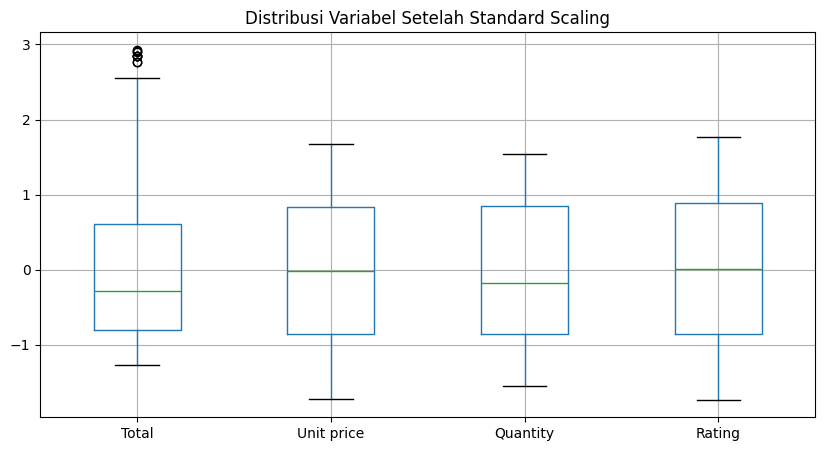

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# pilih kolom numerik sesuai instruksi
num_cols = ['Total', 'Unit price', 'Quantity', 'Rating']

# scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])

# buat dataframe hasil scaling
df_scaled = pd.DataFrame(scaled, columns=num_cols)

# visualisasi distribusi
plt.figure(figsize=(10,5))
df_scaled.boxplot()
plt.title('Distribusi Variabel Setelah Standard Scaling')
plt.show()


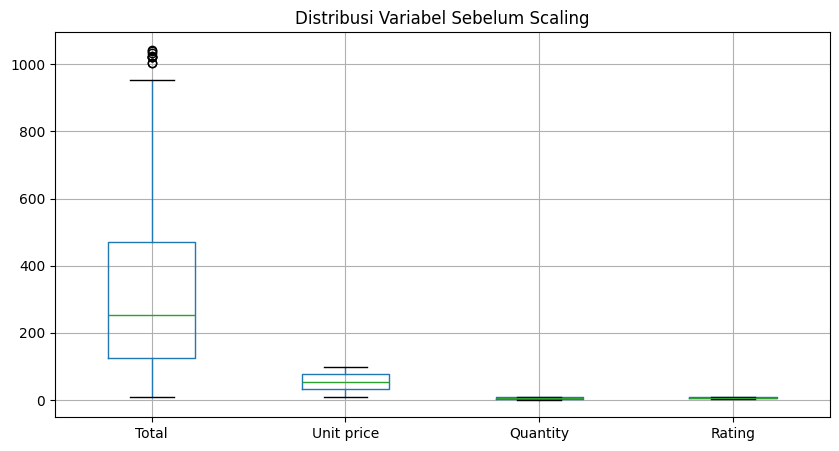

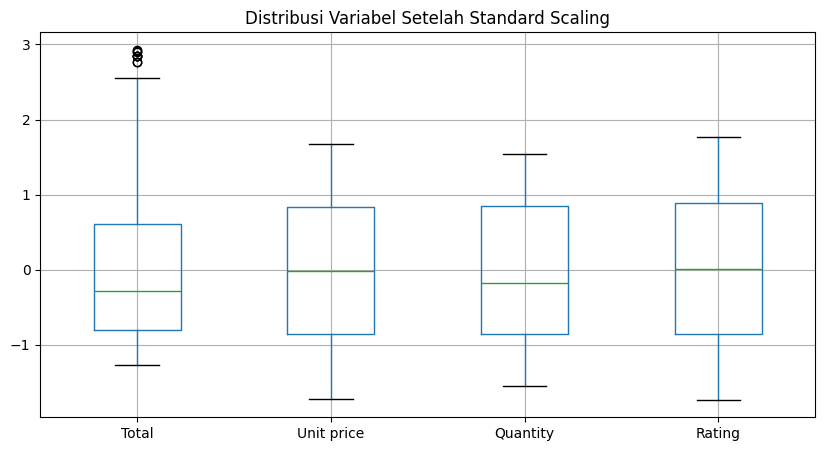

In [ ]:
plt.figure(figsize=(10,5))
df[num_cols].boxplot()
plt.title('Distribusi Variabel Sebelum Scaling')
plt.show()

plt.figure(figsize=(10,5))
df_scaled.boxplot()
plt.title('Distribusi Variabel Setelah Standard Scaling')
plt.show()


#Insigth
Sebelum dilakukan standard scaling, keempat variabel numerik menunjukkan rentang dan skala distribusi yang sangat berbeda satu sama lain. Variabel Total memiliki sebaran yang paling luas dengan nilai maksimum mendekati 1.000 dan banyak outlier, sedangkan Unit Price, Quantity, dan Rating berada pada rentang yang jauh lebih kecil. Perbedaan skala ini membuat perbandingan antar variabel menjadi sulit, karena variabel dengan varian terbesar (seperti Total) mendominasi visualisasi dan dapat mengaburkan pola penting pada variabel lain.

Setelah diterapkan standard scaling, seluruh variabel berhasil diproyeksikan ke dalam skala yang sama, yakni memiliki rata-rata mendekati 0 dan varians sekitar 1, sehingga distribusi menjadi lebih sebanding. Efek scaling ini membuat penyebaran variabel terlihat lebih seragam dan mengurangi bias visual yang sebelumnya disebabkan oleh perbedaan satuan dan rentang nilai. Walaupun variabel Total tetap menunjukkan keberadaan outlier (dengan nilai z-score positif tinggi), struktur datanya kini menjadi lebih mudah dianalisis bersama variabel lain. Dari perspektif EDA, standard scaling membantu dalam proses identifikasi pola, anomali, dan hubungan antar fitur, serta menjadi langkah awal yang penting sebelum melanjutkan ke analisis statistik lanjut atau model machine learning yang sensitif terhadap skala data.

# 3. MinMax Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

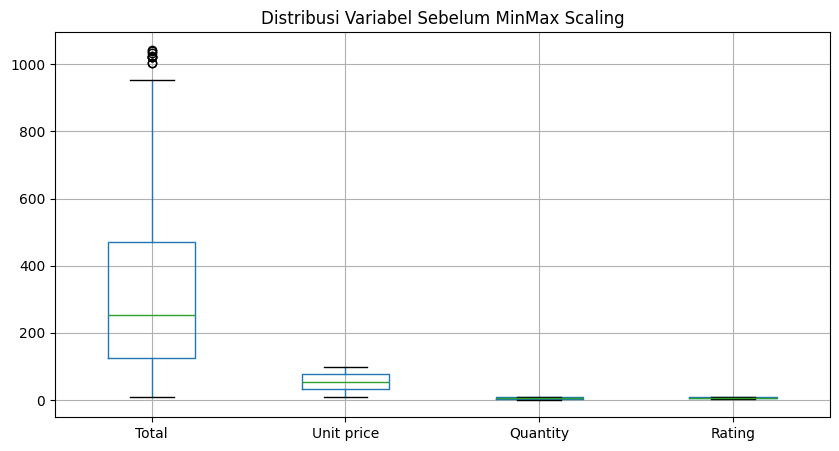

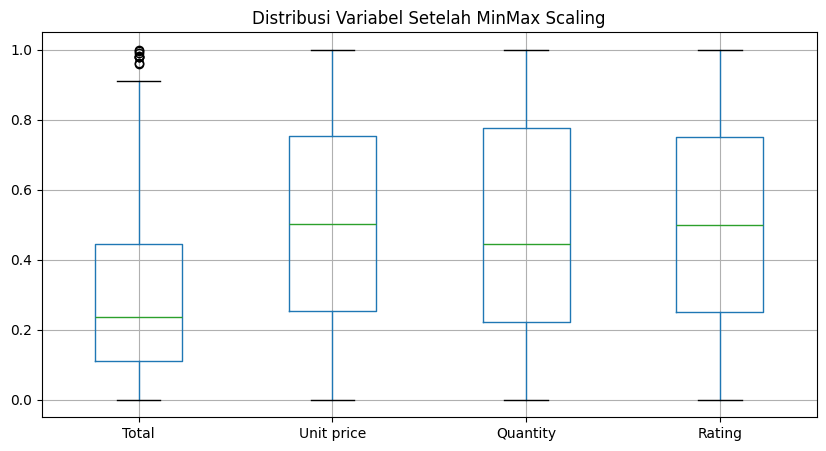

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# pilih kolom numerik
num_cols = ['Total', 'Unit price', 'Quantity', 'Rating']

# MinMax scaling
scaler = MinMaxScaler()
scaled_minmax = scaler.fit_transform(df[num_cols])

# buat dataframe hasil scaling
df_minmax = pd.DataFrame(scaled_minmax, columns=num_cols)

# visualisasi sebelum scaling
plt.figure(figsize=(10,5))
df[num_cols].boxplot()
plt.title('Distribusi Variabel Sebelum MinMax Scaling')
plt.show()

# visualisasi setelah scaling
plt.figure(figsize=(10,5))
df_minmax.boxplot()
plt.title('Distribusi Variabel Setelah MinMax Scaling')
plt.show()


#Insigth
Sebelum dilakukan MinMax Scaling, keempat variabel numerik memiliki rentang nilai yang sangat berbeda, sebagaimana terlihat pada distribusi awal. Variabel Total memiliki rentang paling luas dan mendominasi grafik, sedangkan variabel Unit Price, Quantity, dan Rating berada pada rentang yang lebih kecil sehingga sulit dianalisis secara bersamaan. Perbedaan skala ini menjadi hambatan dalam evaluasi komparatif antar variabel, karena variabel dengan nilai absolut lebih besar (seperti Total) secara visual lebih menonjol dibandingkan variabel lainnya.

Setelah MinMax Scaling diterapkan, seluruh variabel berhasil dipetakan ke dalam rentang yang sama, yaitu [0, 1], tanpa mengubah bentuk dasar distribusi dan hubungan ordinal antar nilai. Transformasi ini mempertahankan informasi relatif antar observasi, namun menghilangkan pengaruh perbedaan satuan dan skala. Selain itu, variabel yang sebelumnya kompres (Quantity dan Rating) menjadi lebih mudah dianalisis secara bersamaan dengan variabel lainnya. Meski outlier pada variabel Total tetap terlihat mendekati batas atas (nilai 1), keberadaannya tidak mengganggu interpretasi karena seluruh variabel kini berada pada space visual yang homogen. Dari sudut pandang eksplorasi data, MinMax Scaling sangat bermanfaat untuk keperluan visualisasi, perbandingan fitur, serta analisis yang membutuhkan normalisasi rentang nilai, seperti clustering atau metode berbasis jarak.

#ReflectionQuestion

1. Bagaimana proses data manipulation (filtering, grouping, dan aggregasi) membantumu menemukan insight yang tidak langsung terlihat dari data mentah?

Proses data manipulation berperan penting dalam mengubah data mentah menjadi informasi yang lebih terstruktur dan bermakna. Melalui filtering, data dapat disaring berdasarkan kondisi tertentu sehingga membantu memfokuskan analisis pada sub-segmen yang relevan dan menghindari distraksi dari data yang tidak diperlukan. Sementara itu, grouping dan agregasi memungkinkan pengelompokan data berdasarkan kategori tertentu serta penghitungan metrik seperti rata-rata atau total, sehingga pola dan hubungan yang sebelumnya tidak terlihat menjadi lebih jelas. Kombinasi ketiga teknik tersebut membantu mengungkap insight yang tidak tersedia langsung dari data mentah, misalnya perbandingan performa antar cabang, identifikasi pola pembelian pelanggan, atau variasi nilai transaksi per kategori produk. Dengan demikian, data manipulation menjadi tahap fundamental dalam proses eksplorasi data sebelum memasuki analisis lebih lanjut.

2. Dari hasil join/merge, pivot, dan crosstab yang kamu buat, insight apa yang paling relevan untuk pengambilan keputusan bisnis, dan mengapa?

Insight yang diperoleh dari proses join/merge, pivot, dan crosstab sangat relevan untuk pengambilan keputusan bisnis karena memperkaya konteks analisis melalui integrasi informasi tambahan dan penyajian hubungan antar variabel kategorikal. Hasil join/merge memberikan perspektif spasial terkait performa cabang per kota, yang dapat mendukung keputusan mengenai alokasi sumber daya atau target penjualan berdasarkan lokasi. Hasil pivot menunjukkan variasi kekuatan penjualan tiap product line pada masing-masing cabang, sehingga dapat dimanfaatkan untuk strategi pengelolaan inventori, penempatan produk, maupun kampanye promosi berbasis lokasi. Sementara itu, hasil crosstab memberikan insight mengenai preferensi metode pembayaran antar tipe pelanggan, yang dapat digunakan untuk penyusunan strategi promosi berbasis pembayaran atau kerja sama dengan penyedia layanan pembayaran. Secara keseluruhan, ketiga teknik tersebut memberikan gambaran komprehensif yang dapat membantu perusahaan mengambil keputusan yang lebih tepat, terarah, dan berbasis data (data-driven decision making).